# Data preprocessing

## Import the libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
# using all the data (all rows and columns)
dataset = pd.read_csv('./data/KIT_Student_Performance.csv')
dataset.head()


,ID,Subject,Score,Semester,Type of Subject,Nature of Subject
0,1,Public Speaking I: TED in the Classroom,94.0,Semester I,Soft Subject,Practical
1,2,Public Speaking I: TED in the Classroom,87.0,Semester I,Soft Subject,Practical
2,3,Public Speaking I: TED in the Classroom,92.0,Semester I,Soft Subject,Practical
3,4,Public Speaking I: TED in the Classroom,95.0,Semester I,Soft Subject,Practical
4,5,Public Speaking I: TED in the Classroom,96.0,Semester I,Soft Subject,Practical


In [45]:
# Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataset["Type of Subject"] = labelencoder.fit_transform(dataset["Type of Subject"]) # 0 for Core subject, 1 for Soft subject
dataset["Nature of Subject"] = labelencoder.fit_transform(dataset["Nature of Subject"]) # 0 for Practical, 1 for Theory
dataset.head(210)


,ID,Subject,Score,Semester,Type of Subject,Nature of Subject
0,1,Public Speaking I: TED in the Classroom,94.0,Semester I,1,0
1,2,Public Speaking I: TED in the Classroom,87.0,Semester I,1,0
2,3,Public Speaking I: TED in the Classroom,92.0,Semester I,1,0
3,4,Public Speaking I: TED in the Classroom,95.0,Semester I,1,0
4,5,Public Speaking I: TED in the Classroom,96.0,Semester I,1,0
...,...,...,...,...,...,...
205,21,The KITian,93.0,Semester I,1,1
206,22,The KITian,95.0,Semester I,1,1
207,23,The KITian,93.0,Semester I,1,1
208,24,The KITian,95.0,Semester I,1,1


In [46]:
features = dataset[["Type of Subject", "Nature of Subject", "Score"]]
features.head()

,Type of Subject,Nature of Subject,Score
0,1,0,94.0
1,1,0,87.0
2,1,0,92.0
3,1,0,95.0
4,1,0,96.0


In [47]:
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Type of Subject    814 non-null    int64  
 1   Nature of Subject  814 non-null    int64  
 2   Score              814 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 19.2 KB
None


In [48]:
# checking for missing values
print(features.isnull().sum())

Type of Subject      0
Nature of Subject    0
Score                0
dtype: int64


In [49]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [50]:
scaled_features

array([[ 0.75592895, -0.75592895,  1.04019169],
       [ 0.75592895, -0.75592895,  0.42197158],
       [ 0.75592895, -0.75592895,  0.86355737],
       ...,
       [-1.32287566, -0.75592895, -0.10793138],
       [-1.32287566, -0.75592895,  1.12850885],
       [-1.32287566, -0.75592895, -0.7261515 ]], shape=(814, 3))

In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
dataset["Cluster"] = kmeans.fit_predict(scaled_features)


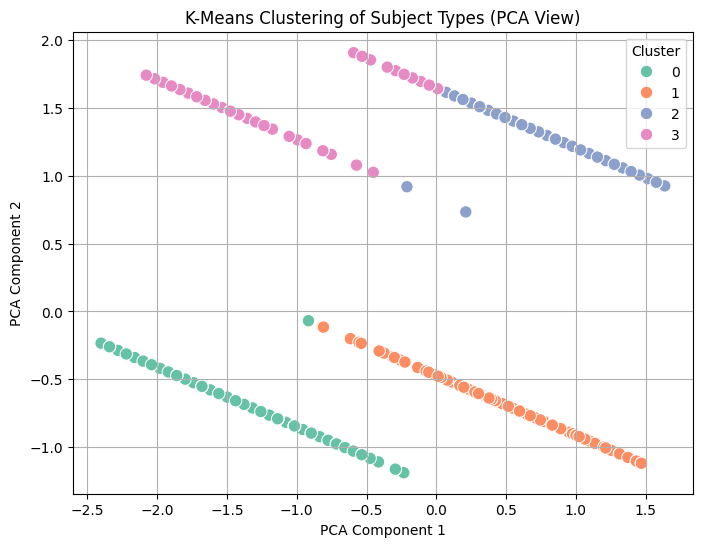

In [54]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

dataset["PCA1"] = pca_components[:, 0]
dataset["PCA2"] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=80)
plt.title("K-Means Clustering of Subject Types (PCA View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [56]:
dataset.groupby("Cluster")[["Type of Subject", "Nature of Subject", "Score"]].mean()


,Type of Subject,Nature of Subject,Score
Cluster,,,
0,0.008929,0.0,75.446429
1,1.000000,0.0,88.244150
2,0.989950,1.0,88.286432
3,0.257732,1.0,67.175258


In [65]:
dataset["Type"] = dataset["Type of Subject"].map({0: "Soft", 1: "Core"})
dataset["Nature"] = dataset["Nature of Subject"].map({0: "Theory", 1: "Practical"})
